In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
dataset='sat5_data.csv'

In [ ]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv(dataset)
data

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/Dataset/sat5_data.csv'

In [ ]:
data['Iono Delay-4 (m)']

0        8.065679
1        8.065783
2        8.065887
3        8.065991
4        8.066097
           ...   
86394    8.065156
86395    8.065263
86396    8.065365
86397    8.065471
86398    8.065575
Name: Iono Delay-4 (m), Length: 86399, dtype: float64

In [ ]:
c=299792458
f_L5=1176.45*pow(10,6)
print(f_L5)
print(c)

c_fL5=c/f_L5
print(c_fL5)

data['Carrier Delay-4 (meters)']=data['Carrier Delay-4 (cycles)']*c_fL5
data['Clock Bias (meters)']=data['Clock Bias (ns)']*pow(10,-9)*c

data['Corrected Carrier Range-4 (m)']=data['Carrier Delay-4 (meters)'] - data['Clock Bias (meters)']

data['Code - Carrier-4 (m)']=data['PR-4 (m)']-data['Corrected Carrier Range-4 (m)']

# data['NEW Code - Carrier-4 (m)']= data['Code - Carrier-4 (m)'] - 2*data['Iono Delay-4 (m)']
data['NEW Code - Carrier-4 (m)']= data['Code - Carrier-4 (m)']

1176450000.0
299792458
0.25482804879085386


In [ ]:
X = data[['NEW Code - Carrier-4 (m)','Elevation-4 (deg)']]
X

,NEW Code - Carrier-4 (m),Elevation-4 (deg)
0,-14.325782,41.197083
1,-11.098051,41.195946
2,-13.169649,41.194805
3,-14.953347,41.193668
4,-11.196580,41.192532
...,...,...
86394,-12.271573,41.202766
86395,-13.822513,41.201630
86396,-10.026667,41.200493
86397,-11.338913,41.199356


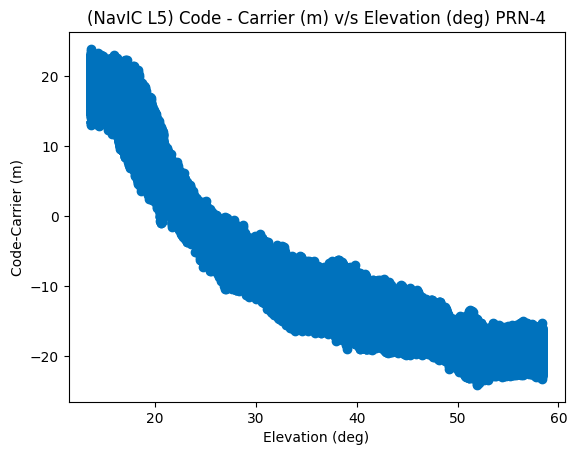

In [ ]:
#Visualise data points
plt.scatter(X['Elevation-4 (deg)'],X['NEW Code - Carrier-4 (m)'],c='#0072BD')
plt.xlabel('Elevation (deg)')
plt.ylabel('Code-Carrier (m)')
plt.title('(NavIC L5) Code - Carrier (m) v/s Elevation (deg) PRN-4')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-8-f346fd486836>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  frame.column=['Elevation-4 (deg)','NEW Code - Carrier-4 (m)','cluster']


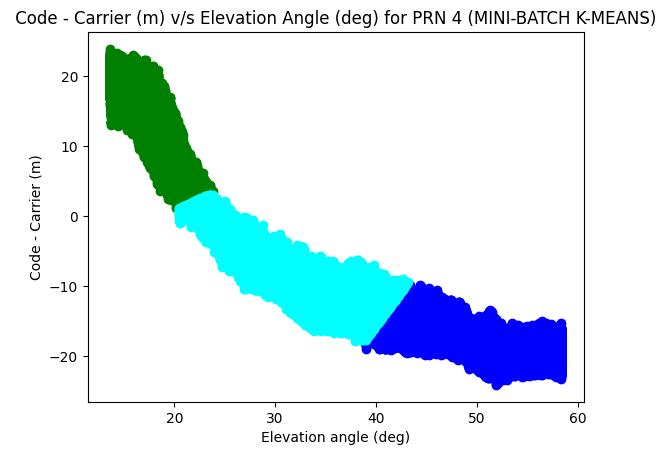

In [ ]:
from sklearn.cluster import MiniBatchKMeans
import matplotlib.patches as mpatches
MBKMean=MiniBatchKMeans(n_clusters=3)
MBKMean.fit(X)

label=MBKMean.predict(X)

frame=pd.DataFrame(X)
frame['cluster']=label

frame.column=['Elevation-4 (deg)','NEW Code - Carrier-4 (m)','cluster']

color=['blue','green','cyan']

for k in range(0,3):
    X=frame[frame['cluster']==k]
    plt.scatter(X['Elevation-4 (deg)'],X['NEW Code - Carrier-4 (m)'],c=color[k])

plt.ylabel('Code - Carrier (m)')
plt.xlabel('Elevation angle (deg)')
# Creating legend with color box
blue_patch = mpatches.Patch(color='blue', label='LOS')
green_patch = mpatches.Patch(color='green', label='NLOS')
cyan_patch = mpatches.Patch(color='cyan', label='Multipath')
# plt.legend(handles=[blue_patch,green_patch,cyan_patch])

plt.title(' Code - Carrier (m) v/s Elevation Angle (deg) for PRN 4 (MINI-BATCH K-MEANS) ')

plt.show()

In [ ]:
DF = pd.DataFrame(label)
DF.to_csv('predicted_values-4(mini-kmeans).csv')

In [ ]:
X = data[['NEW Code - Carrier-4 (m)','Elevation-4 (deg)']]
X

,NEW Code - Carrier-4 (m),Elevation-4 (deg)
0,-30.457140,41.197083
1,-27.229617,41.195946
2,-29.301423,41.194805
3,-31.085329,41.193668
4,-27.328774,41.192532
...,...,...
86394,-28.401885,41.202766
86395,-29.953039,41.201630
86396,-26.157397,41.200493
86397,-27.469855,41.199356


In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, label, metric='euclidean')
print('Silhoutte Score for Mini-Batch KMeans is ', score)

Silhoutte Score for Mini-Batch KMeans is  0.5934985180159033


In [ ]:
DF=pd.read_csv('/content/predicted_values-4(mini-kmeans).csv')
DF=DF.iloc[:,1:]
DF

,0
0,0
1,0
2,0
3,0
4,0
...,...
86394,0
86395,0
86396,0
86397,0


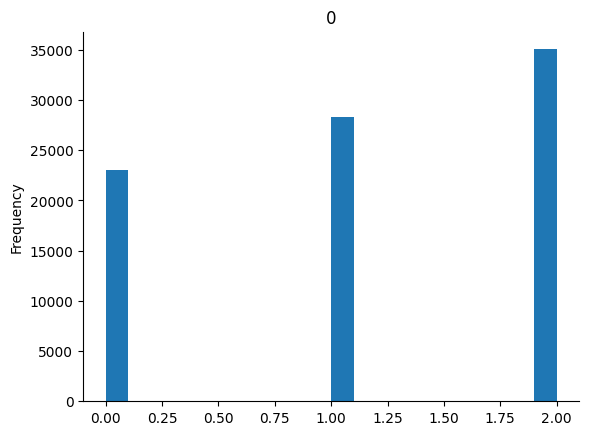

In [ ]:
from matplotlib import pyplot as plt
DF['0'].plot(kind='hist', bins=20, title='0')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
x=data[['C/NO-4 (dB-Hz)','Elevation-4 (deg)']]
x

,C/NO-4 (dB-Hz),Elevation-4 (deg)
0,47.163952,41.197083
1,47.433468,41.195946
2,47.084606,41.194805
3,46.461071,41.193668
4,46.561821,41.192532
...,...,...
86394,46.218792,41.202766
86395,46.546741,41.201630
86396,46.370571,41.200493
86397,46.557549,41.199356


In [ ]:
y=DF.iloc[:,:]
y

,0
0,0
1,0
2,0
3,0
4,0
...,...
86394,0
86395,0
86396,0
86397,0


In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(x, y, test_size = 0.30, random_state = 0)

In [ ]:
# import support vector classifier
# "Support Vector Classifier"
from sklearn.svm import SVC
clf = SVC(kernel='linear')

# fitting x samples and y classes
clf.fit(train_X, train_y)

prediction=clf.predict(test_X)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,test_y))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9929398148148149


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
cm = confusion_matrix(test_y, prediction)

print ("Confusion Matrix : \n", cm)

from sklearn.metrics import cohen_kappa_score
print("Cohen-kappa score:", cohen_kappa_score(prediction,test_y))

Confusion Matrix : 
 [[ 6793    58    26]
 [   83  8340     0]
 [   16     0 10604]]
Cohen-kappa score: 0.9892397668523597


# K-Means

In [ ]:
X = data[['NEW Code - Carrier-4 (m)','Elevation-4 (deg)']]
X

,NEW Code - Carrier-4 (m),Elevation-4 (deg)
0,-30.457140,41.197083
1,-27.229617,41.195946
2,-29.301423,41.194805
3,-31.085329,41.193668
4,-27.328774,41.192532
...,...,...
86394,-28.401885,41.202766
86395,-29.953039,41.201630
86396,-26.157397,41.200493
86397,-27.469855,41.199356


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-24-44f7f93ee60b>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  frame.column=['Elevation-4 (deg)','NEW Code - Carrier-4 (m)','cluster']


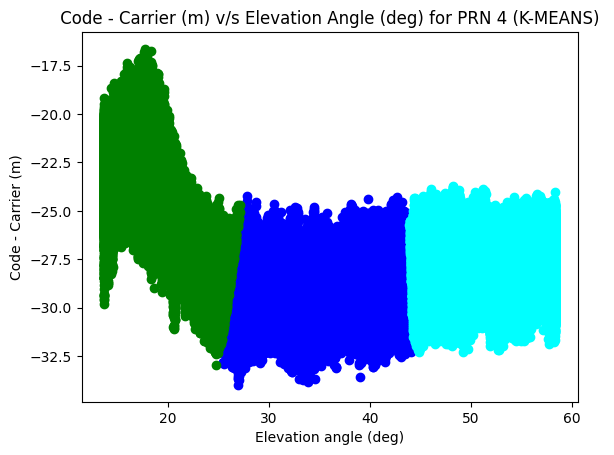

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.patches as mpatches
KMean=KMeans(n_clusters=3)
KMean.fit(X)

label=KMean.predict(X)

frame=pd.DataFrame(X)
frame['cluster']=label

frame.column=['Elevation-4 (deg)','NEW Code - Carrier-4 (m)','cluster']

color=['blue','green','cyan']

for k in range(0,3):
    X=frame[frame['cluster']==k]
    plt.scatter(X['Elevation-4 (deg)'],X['NEW Code - Carrier-4 (m)'],c=color[k])

plt.ylabel('Code - Carrier (m)')
plt.xlabel('Elevation angle (deg)')
# Creating legend with color box
blue_patch = mpatches.Patch(color='blue', label='LOS')
green_patch = mpatches.Patch(color='green', label='NLOS')
cyan_patch = mpatches.Patch(color='cyan', label='Multipath')
# plt.legend(handles=[blue_patch,green_patch,cyan_patch])

plt.title(' Code - Carrier (m) v/s Elevation Angle (deg) for PRN 4 (K-MEANS) ')

plt.show()

In [ ]:
DF = pd.DataFrame(label)
DF.to_csv('predicted_values-4(kmeans).csv')

In [ ]:
X = data[['NEW Code - Carrier-4 (m)','Elevation-4 (deg)']]
X

,NEW Code - Carrier-4 (m),Elevation-4 (deg)
0,-30.457140,41.197083
1,-27.229617,41.195946
2,-29.301423,41.194805
3,-31.085329,41.193668
4,-27.328774,41.192532
...,...,...
86394,-28.401885,41.202766
86395,-29.953039,41.201630
86396,-26.157397,41.200493
86397,-27.469855,41.199356


In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, label, metric='euclidean')
print('Silhoutte Score for KMeans is ', score)

Silhoutte Score for KMeans is  0.5968678944219665


In [ ]:
DF=pd.read_csv('/content/predicted_values-4(kmeans).csv')
DF=DF.iloc[:,1:]
DF

,0
0,0
1,0
2,0
3,0
4,0
...,...
86394,0
86395,0
86396,0
86397,0


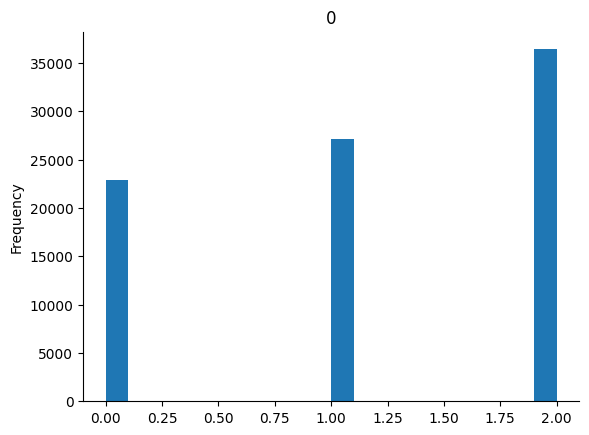

In [ ]:
from matplotlib import pyplot as plt
DF['0'].plot(kind='hist', bins=20, title='0')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
x=data[['C/NO-4 (dB-Hz)','Elevation-4 (deg)']]
x

,C/NO-4 (dB-Hz),Elevation-4 (deg)
0,47.163952,41.197083
1,47.433468,41.195946
2,47.084606,41.194805
3,46.461071,41.193668
4,46.561821,41.192532
...,...,...
86394,46.218792,41.202766
86395,46.546741,41.201630
86396,46.370571,41.200493
86397,46.557549,41.199356


In [ ]:
y=DF.iloc[:,:]
y

,0
0,0
1,0
2,0
3,0
4,0
...,...
86394,0
86395,0
86396,0
86397,0


In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(x, y, test_size = 0.30, random_state = 0)

In [ ]:
# import support vector classifier
# "Support Vector Classifier"
from sklearn.svm import SVC
clf = SVC(kernel='linear')

# fitting x samples and y classes
clf.fit(train_X, train_y)

prediction=clf.predict(test_X)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,test_y))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9935956790123457


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
cm = confusion_matrix(test_y, prediction)

print ("Confusion Matrix : \n", cm)

from sklearn.metrics import cohen_kappa_score
print("Cohen-kappa score:", cohen_kappa_score(prediction,test_y))

Confusion Matrix : 
 [[ 6727    79    17]
 [   55  8019     0]
 [   15     0 11008]]
Cohen-kappa score: 0.990188951743425
